In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Set the correct dataset path
dataset_path = "/Users/nyssaaftab/Downloads/vowels"

# Set up data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create the training data generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Print the class indices
#print(train_generator.class_indices)

# Rest of your code, including model training, evaluation, and predictions

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(200, 200),  # Adjust target_size to match your image size
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Build a simple convolutional neural network (CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)
model.save('handwritten.model')


/Users/nyssaaftab/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 40 images belonging to 4 classes.
Found 10 images belonging to 4 classes.
Epoch 1/10
2/2 [==============================] - 1s 365ms/step - loss: 87.1583 - accuracy: 0.2000 - val_loss: 122.0058 - val_accuracy: 0.3000
Epoch 2/10
2/2 [==============================] - 0s 211ms/step - loss: 86.7247 - accuracy: 0.3000 - val_loss: 68.3251 - val_accuracy: 0.3000
Epoch 3/10
2/2 [==============================] - 0s 110ms/step - loss: 58.3565 - accuracy: 0.3000 - val_loss: 27.4795 - val_accuracy: 0.3000
Epoch 4/10
2/2 [==============================] - 0s 196ms/step - loss: 10.6181 - accuracy: 0.5250 - val_loss: 8.0479 - val_accuracy: 0.2000
Epoch 5/10
2/2 [==============================] - 0s 197ms/step - loss: 8.5783 - accuracy: 0.3000 - val_loss: 14.8706 - val_accuracy: 0.2000
Epoch 6/10
2/2 [==============================] - 0s 124ms/step - loss: 8.5723 - accuracy: 0.3500 - val_loss: 7.8116 - val_accuracy: 0.2000
Epoch 7/10
2/2 [==============================] - 0s 113ms/step - loss:

INFO:tensorflow:Assets written to: handwritten.model/assets


In [7]:
print(train_generator.class_indices)


{'a': 0, 'e': 1, 'i': 2, 'u': 3}


In [2]:
#save model
model = tf.keras.models.load_model('handwritten.model')

In [4]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)

# Print the evaluation results
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

1/1 [==============================] - 0s 51ms/step - loss: 2.6833 - accuracy: 0.2000
Validation Loss: 2.6832807064056396
Validation Accuracy: 0.20000000298023224


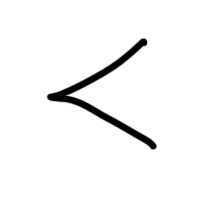

1/1 [==============================] - 0s 66ms/step
This digit is probably a 3


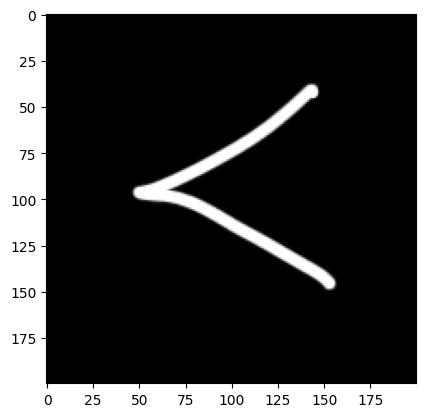

In [10]:
img = cv2.imread("u.png")

img = cv2.imread("u.png")

display(Image(filename="u.png"))


#expected_shape = (28, 28)

img = np.invert(np.array([img]))
prediction = model.predict(img)
print(f"This digit is probably a {np.argmax(prediction)}")
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()